# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from collections import OrderedDict
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# url from weather site

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"






In [44]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=c0fb174edbfc06fb990c94a71bd205c5


## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# checking to see if i can call data for a single city

requests.get(query_url + f"&q=dallas").json()

{'coord': {'lon': -96.7836, 'lat': 32.7668},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 273.34,
  'feels_like': 267.73,
  'temp_min': 272.59,
  'temp_max': 274.15,
  'pressure': 1021,
  'humidity': 80},
 'visibility': 4828,
 'wind': {'speed': 4.63, 'deg': 360, 'gust': 10.29},
 'clouds': {'all': 90},
 'dt': 1612987105,
 'sys': {'type': 1,
  'id': 3783,
  'country': 'US',
  'sunrise': 1612962888,
  'sunset': 1613002086},
 'timezone': -21600,
 'id': 4684904,
 'name': 'Dallas',
 'cod': 200}

In [60]:
city_api = []
lati = []
longi = []
max_tempt = []
humi = []
cloudiness = []
wind_speed = []
country = []
date = []


cityofheroes = 1 

for city in cities:
    
    
    try:
        response = requests.get(query_url + f"&q={city}").json()
        city_api.append(response["name"])
        lati.append(response["coord"]["lat"])
        longi.append(response["coord"]["lon"])
        max_tempt.append(response["main"]["temp_max"])
        humi.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

        print(f"Processing Record {cityofheroes} | {city}")
        
        cityofheroes = cityofheroes + 1
        
        time.sleep(1.00)
    
    except:
    
        print("City not found. Skipping...")

Processing Record 1 | leningradskiy
Processing Record 2 | severo-kurilsk
Processing Record 3 | kapaa
City not found. Skipping...
Processing Record 4 | atuona
Processing Record 5 | barrow
Processing Record 6 | marapanim
Processing Record 7 | hobart
City not found. Skipping...
Processing Record 8 | jamestown
Processing Record 9 | puerto ayora
Processing Record 10 | punta arenas
City not found. Skipping...
Processing Record 11 | hithadhoo
Processing Record 12 | rikitea
Processing Record 13 | ferme-neuve
Processing Record 14 | pevek
Processing Record 15 | yaan
Processing Record 16 | ponta do sol
Processing Record 17 | ushuaia
Processing Record 18 | qaanaaq
Processing Record 19 | westport
Processing Record 20 | sao filipe
Processing Record 21 | firovo
Processing Record 22 | bluff
Processing Record 23 | avarua
Processing Record 24 | krasnoselkup
Processing Record 25 | tuatapere
Processing Record 26 | matagami
Processing Record 27 | saint-philippe
Processing Record 28 | bubaque
Processing Rec

Processing Record 236 | meulaboh
Processing Record 237 | sao joao da barra
Processing Record 238 | ahipara
Processing Record 239 | garissa
City not found. Skipping...
Processing Record 240 | zhigansk
Processing Record 241 | portland
Processing Record 242 | jales
Processing Record 243 | flinders
Processing Record 244 | ruteng
Processing Record 245 | loandjili
Processing Record 246 | leshukonskoye
Processing Record 247 | cherskiy
Processing Record 248 | verkhniy avzyan
Processing Record 249 | kirakira
Processing Record 250 | college
Processing Record 251 | la rioja
Processing Record 252 | carutapera
Processing Record 253 | guiglo
City not found. Skipping...
Processing Record 254 | klamath falls
Processing Record 255 | jorpeland
Processing Record 256 | harper
Processing Record 257 | grand-bourg
Processing Record 258 | moissala
Processing Record 259 | nazarovo
Processing Record 260 | norman wells
Processing Record 261 | makakilo city
City not found. Skipping...
Processing Record 262 | aksa

Processing Record 464 | tak bai
Processing Record 465 | mamakan
Processing Record 466 | rancho palos verdes
Processing Record 467 | gigmoto
Processing Record 468 | whyalla
Processing Record 469 | lisala
Processing Record 470 | semey
Processing Record 471 | zharkovskiy
Processing Record 472 | tecoanapa
Processing Record 473 | yichang
Processing Record 474 | ferkessedougou
Processing Record 475 | amazar
Processing Record 476 | payson
Processing Record 477 | lensk
Processing Record 478 | litovko
Processing Record 479 | muroto
Processing Record 480 | awbari
Processing Record 481 | makhalino
Processing Record 482 | timizart
Processing Record 483 | blagoyevo
Processing Record 484 | fortuna
Processing Record 485 | dali
Processing Record 486 | scottsbluff
City not found. Skipping...
Processing Record 487 | melo
Processing Record 488 | astoria
Processing Record 489 | yulara
Processing Record 490 | port-cartier
Processing Record 491 | panacan
Processing Record 492 | asyut
Processing Record 493 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
cityweather_dict = {
                    "City": city_api,
                    "Cloudiness":cloudiness, 
                    "Country":country,
                    "Date":date, 
                    "Humidity": humi,
                    "Lat":lati, 
                    "Lng":longi, 
                    "Max Temp": max_tempt,
                    "Wind Speed":wind_speed
                    }


weather_datadf = pd.DataFrame(cityweather_dict)

weather_datadf.head()














,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Leningradskiy,3,RU,1612987269,83,69.3833,178.4167,239.41,4.43
1,Severo-Kuril'sk,100,RU,1612987270,87,50.6789,156.1250,269.61,1.98
2,Kapaa,40,US,1612987075,49,22.0752,-159.3190,296.15,6.69
3,Atuona,1,PF,1612987273,77,-9.8000,-139.0333,299.26,8.33
4,Barrow,1,US,1612987274,68,71.2906,-156.7887,241.15,4.63


In [62]:
# more detailed
weather_datadf


weather_datadf.style.set_properties(**{'text-align': 'right'}).set_table_styles([ dict(selector='th', props=[('text-align', 'right')] ) ])

In [63]:
weatherdataupload = weather_datadf.to_csv("cities.csv", index = True)


In [64]:
weather_datadf.describe

<bound method NDFrame.describe of                 City  Cloudiness Country        Date  Humidity      Lat  \
0      Leningradskiy           3      RU  1612987269        83  69.3833   
1    Severo-Kuril'sk         100      RU  1612987270        87  50.6789   
2              Kapaa          40      US  1612987075        49  22.0752   
3             Atuona           1      PF  1612987273        77  -9.8000   
4             Barrow           1      US  1612987274        68  71.2906   
..               ...         ...     ...         ...       ...      ...   
548         Tarauacá          98      BR  1612987901        66  -8.1614   
549           Kourou          75      GF  1612987902        94   5.1552   
550         Pimentel           0      PE  1612987904        48  -6.8367   
551         Weligama          98      LK  1612987905        83   5.9667   
552     Port Augusta           0      AU  1612987906        48 -32.5000   

          Lng  Max Temp  Wind Speed  
0    178.4167    239.41    

In [65]:
weatherstats = pd.DataFrame(weather_datadf)

weatherstats.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,53.338156,1.612988e+09,71.643761,21.396720,23.146911,282.424828,3.560090
std,39.759097,2.107515e+02,20.366961,32.878467,90.683404,18.694449,2.533696
min,0.000000,1.612987e+09,1.000000,-54.800000,-179.166700,236.150000,0.070000
25%,12.000000,1.612987e+09,59.000000,-5.226900,-54.183300,268.150000,1.740000
50%,58.000000,1.612988e+09,77.000000,26.588100,29.145800,289.150000,2.960000
75%,94.000000,1.612988e+09,88.000000,49.200000,103.460900,298.160000,4.630000
max,100.000000,1.612988e+09,100.000000,78.218600,179.316700,310.150000,15.710000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
# see if there is any cities with humidity more than a hundred 
weather_datadf.loc[weather_datadf["Humidity"] >= 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
169,Leninsk,75,RU,1612987462,100,48.7119,45.1994,271.15,7.00
188,Kiryat Gat,0,IL,1612987484,100,31.6100,34.7642,289.26,1.34
208,Grants Pass,90,US,1612987506,100,42.4390,-123.3284,280.15,0.71
243,Ruteng,100,ID,1612987546,100,-8.6136,120.4721,290.49,0.29
311,Airai,100,TL,1612987505,100,-8.9266,125.4092,289.30,0.76
379,Severnyy,90,RU,1612987701,100,50.6770,36.5532,271.15,2.00
393,Mocsa,90,HU,1612987717,100,47.6700,18.1850,275.93,4.63
435,Aljezur,87,PT,1612987764,100,37.3191,-8.8033,288.15,1.79
534,Vondrozo,100,MG,1612987883,100,-22.8167,47.2833,292.37,1.10


In [67]:
#  Get the indices of cities that have humidity over 100%.

# when run non over 100%  though live data each run may require new consideration 

In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humoutlier_low = weather_datadf["Humidity"].quantile(0.01)
humoutlier_hi  = weather_datadf["Humidity"].quantile(0.99)

weather_datadf_filtered = weather_datadf[(weather_datadf["Humidity"] < humoutlier_hi) & (weather_datadf["Humidity"] > humoutlier_low)]

weather_datadf_filtered


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Leningradskiy,3,RU,1612987269,83,69.3833,178.4167,239.41,4.43
1,Severo-Kuril'sk,100,RU,1612987270,87,50.6789,156.1250,269.61,1.98
2,Kapaa,40,US,1612987075,49,22.0752,-159.3190,296.15,6.69
3,Atuona,1,PF,1612987273,77,-9.8000,-139.0333,299.26,8.33
4,Barrow,1,US,1612987274,68,71.2906,-156.7887,241.15,4.63
...,...,...,...,...,...,...,...,...,...
548,Tarauacá,98,BR,1612987901,66,-8.1614,-70.7656,303.75,1.17
549,Kourou,75,GF,1612987902,94,5.1552,-52.6478,298.15,2.57
550,Pimentel,0,PE,1612987904,48,-6.8367,-79.9342,303.15,5.14
551,Weligama,98,LK,1612987905,83,5.9667,80.4167,295.69,2.04


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

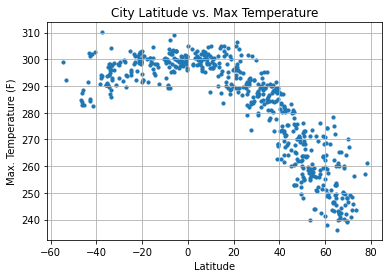

In [69]:
plt.scatter(weather_datadf["Lat"], weather_datadf["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

# it would appear based on the api data that the lower the latitude the higher the max tempature possibility
# the higher the latitude the lower the possible max tempt would be.

## Latitude vs. Humidity Plot

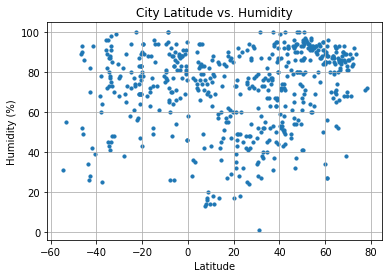

In [70]:
# Build a scatter plot for each data type
plt.scatter(weather_datadf["Lat"], weather_datadf["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

# There is a more dense cluster of plots with higher Humidity percentage in higher latitudes 
# Humidity plots tend to mostly be above 40% regardless of latitude

## Latitude vs. Cloudiness Plot

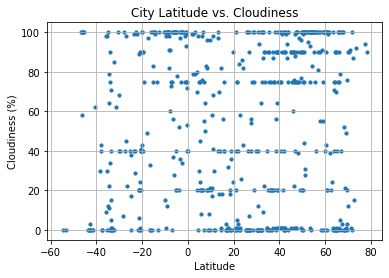

In [71]:
# Build a scatter plot for each data type
plt.scatter(weather_datadf["Lat"], weather_datadf["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#latitude appears to have little distribution affect on Cloudiness based on the data set

## Latitude vs. Wind Speed Plot

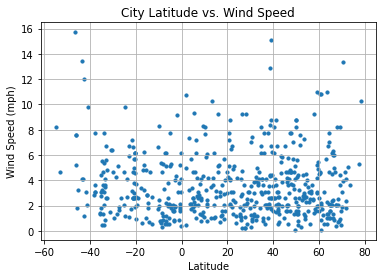

In [72]:
# Build a scatter plot for each data type
plt.scatter(weather_datadf["Lat"], weather_datadf["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#cities in the data set all appear to be clustered 12 mph minus a few outliers regardless of latitude 

## Linear Regression

In [73]:
northern_hem = weather_datadf[weather_datadf["Lat"]<1]
southern_hem = weather_datadf[weather_datadf["Lat"]>1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4939630767066656


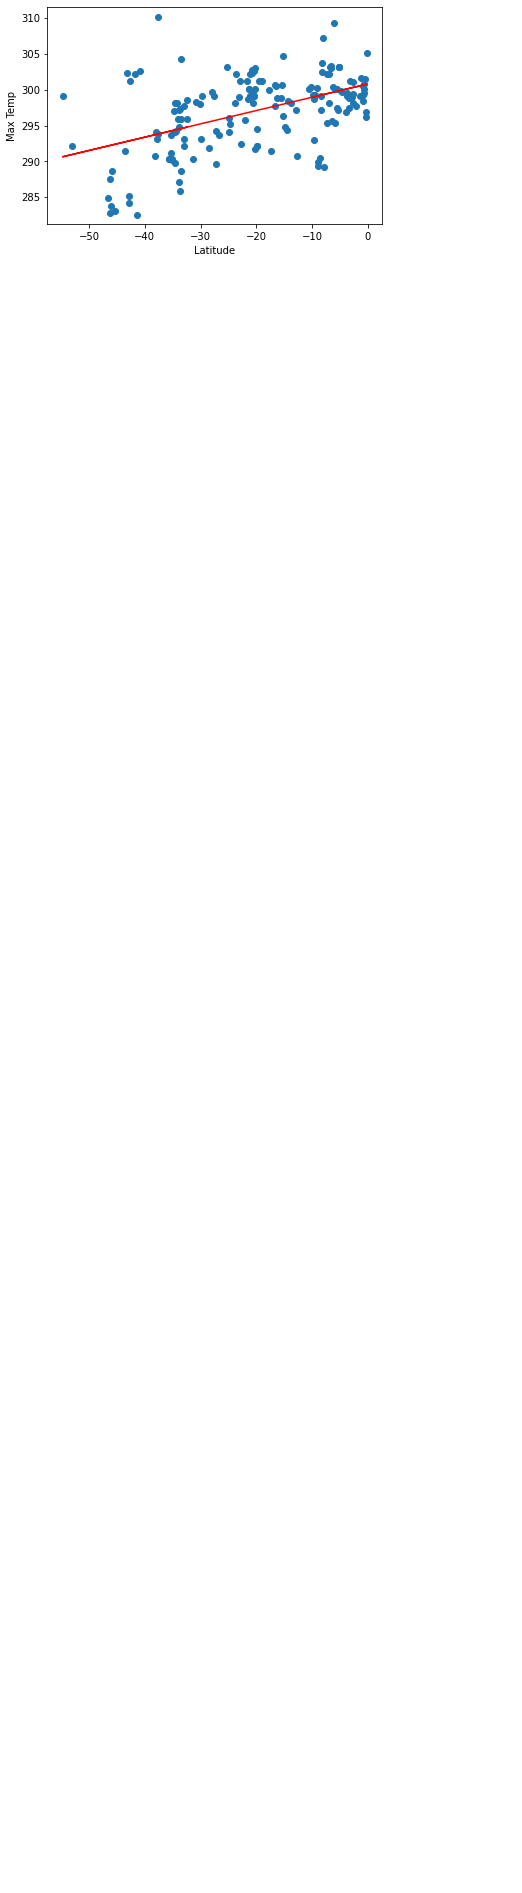

<Figure size 432x288 with 0 Axes>

In [74]:
x_values=northern_hem["Lat"]

y_values = northern_hem["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("N_linear_Lat_MT.png")

# Based on the data and plot there is a slight positive correlation between Max temp and latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8989573266910966


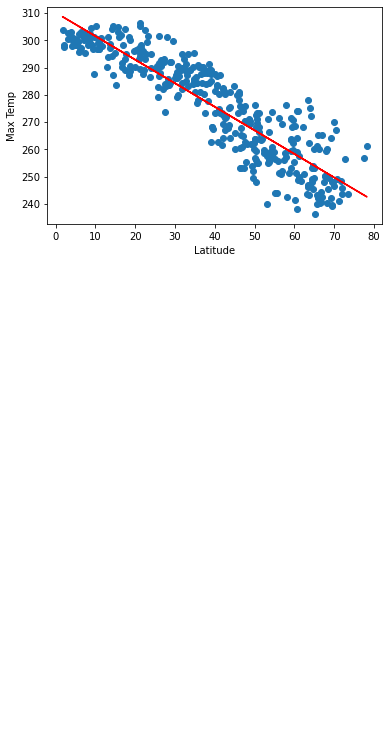

<Figure size 432x288 with 0 Axes>

In [75]:
x_values =southern_hem["Lat"]

y_values = southern_hem["Max Temp"]
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("S_linear_Lat_MT.png")

# Based on the regression there is a strong negative correlation in the southern hemisphere's Max tempt and latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2261836914075856


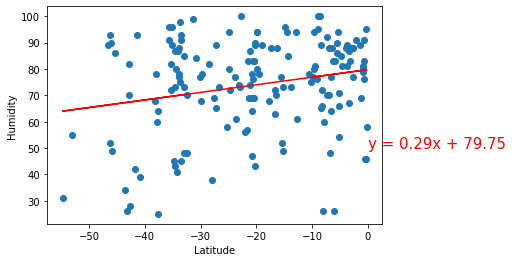

<Figure size 432x288 with 0 Axes>

In [76]:
x_values =northern_hem['Lat']

y_values = northern_hem['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('N_linear_Lat_Hum.png')

# Based on the data and plot there is little correlation between the Northern Hems Humidity and latitude Regression 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3743423630066927


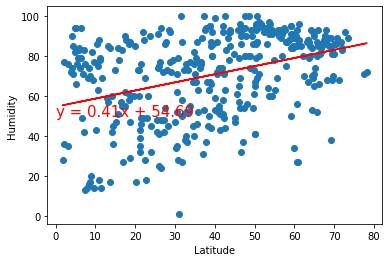

<Figure size 432x288 with 0 Axes>

In [77]:
x_values =southern_hem['Lat']

y_values = southern_hem['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('S_linear_Lat_Hum.png')

# based on the data and plot there is little correlation between the humidty and lat regression in the southern
# however there is more than in the north

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.37719957286439315


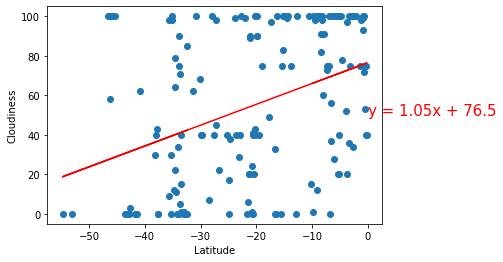

<Figure size 432x288 with 0 Axes>

In [78]:

x_values =northern_hem['Lat']

y_values = northern_hem['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('N_linear_Lat_Cl.png')

# based on the data between cloudines and lat regression in the northern hem there is  little correlation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18129196761405428


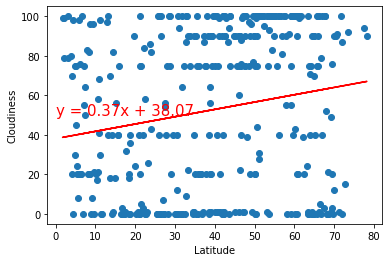

<Figure size 432x288 with 0 Axes>

In [79]:
x_values =southern_hem['Lat']

y_values = southern_hem['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('S_linear_Lat_Cl.png')

# based on the data and plot there is even less correlation in the southern hem for cloudiness and lat regression than
# the norths which already had little correlation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3113142775076595


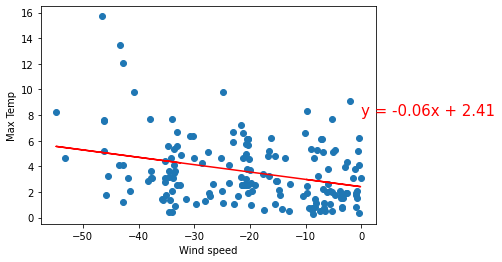

<Figure size 432x288 with 0 Axes>

In [80]:
x_values = northern_hem['Lat']

y_values = northern_hem['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,8),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('N_linear_Lat_W.png')

# Northern hem wind speed and lat regression has a weak negative correlation based on data and plot 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006160678361947907


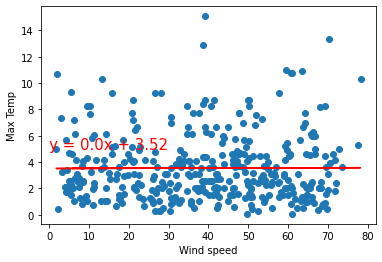

<Figure size 432x288 with 0 Axes>

In [81]:
x_values = southern_hem["Lat"]

y_values = southern_hem["Wind Speed"]
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('S_linear_Lat_W.png')

# Based on the data there is a weak correlation between southern hem wind speed and linear regress